In [85]:
from nba_api.stats.static import players
import pandas as pd
from nba_api.stats.endpoints import shotchartdetail
import urllib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

In [86]:
nba_players = players.get_players()
player_name = 'Stephen Curry'
for player in nba_players:
    if player["full_name"] == player_name:
        find_player = player
print(find_player)

{'id': 201939, 'full_name': 'Stephen Curry', 'first_name': 'Stephen', 'last_name': 'Curry', 'is_active': True}


In [87]:
# Single Season
shot_chart = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=find_player['id'],
    season_nullable='2018-19').get_data_frames()[0]

In [88]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [89]:
def draw_scatter(shot_chart):
    plt.figure(figsize=(12,11))
    shot_chart.plot(x = 'LOC_X', y = 'LOC_Y', kind='scatter', s = 3)
    draw_court(outer_lines=True)
    # Descending values along the axis from left to right
    plt.xlim(300,-300)
    plt.xlim(-300,300)
    plt.ylim(-100,500)
    plt.show()

In [90]:
def draw_heatmap(shot_chart):
    plt.figure(figsize=(12,11))
    shot_chart.plot('LOC_X','LOC_Y',kind='hexbin',colormap='gist_heat_r')
    draw_court(outer_lines=True)
    plt.xlim(300,-300)
    plt.xlim(-300,300)
    plt.ylim(-100,500)
    plt.show()

<Figure size 1200x1100 with 0 Axes>

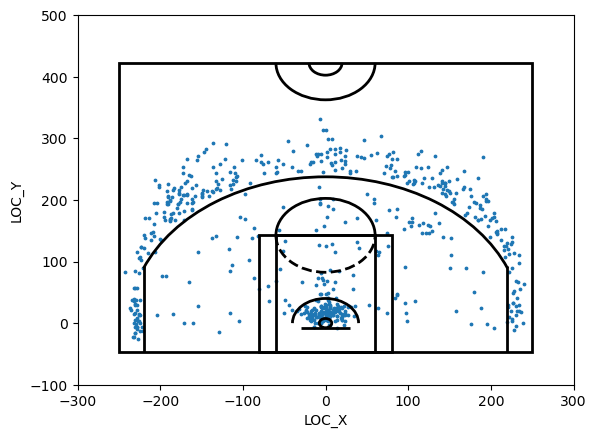

In [91]:
draw_scatter(shot_chart)

<Figure size 1200x1100 with 0 Axes>

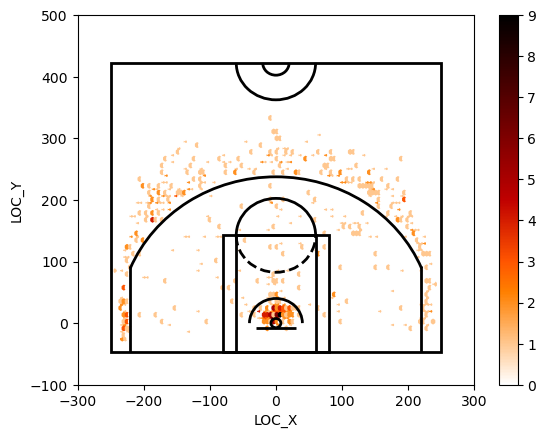

In [92]:
# # Season heatmap
draw_heatmap(shot_chart)

<Figure size 1200x1100 with 0 Axes>

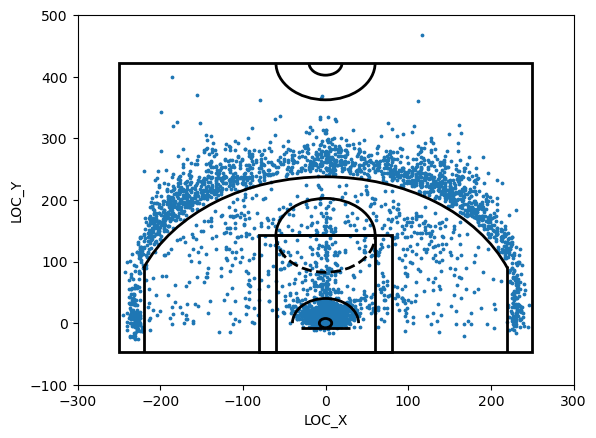

In [93]:
# Last five years
season_list = []
for season in ['2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']:
    shot_chart = shotchartdetail.ShotChartDetail(
        team_id=0,
        player_id=find_player['id'],
        season_nullable=season).get_data_frames()[0]
    season_list.append(shot_chart)
combined_chart = pd.concat(season_list)
combined_chart.shape
draw_scatter(combined_chart)

In [101]:
# player career shots
from nba_api.stats.endpoints import playercareerstats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',200)
career = playercareerstats.PlayerCareerStats(player_id=find_player['id'])
# print(type(career.get_data_frames()[0]))
player_career = career.get_data_frames()[0]
player_career

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201939,2009-10,00,1610612744,GSW,22.0,80,77,2896.0,528,1143,0.462,166,380,0.437,177,200,0.885,48,308,356,472,152,19,243,252,1399
1,201939,2010-11,00,1610612744,GSW,23.0,74,74,2489.0,505,1053,0.480,151,342,0.442,212,227,0.934,52,234,286,432,109,20,226,233,1373
2,201939,2011-12,00,1610612744,GSW,24.0,26,23,732.0,145,296,0.490,55,121,0.455,38,47,0.809,15,73,88,138,39,8,65,62,383
3,201939,2012-13,00,1610612744,GSW,25.0,78,78,2983.0,626,1388,0.451,272,600,0.453,262,291,0.900,59,255,314,539,126,12,240,198,1786
4,201939,2013-14,00,1610612744,GSW,26.0,78,78,2846.0,652,1383,0.471,261,615,0.424,308,348,0.885,46,288,334,666,128,14,294,194,1873
5,201939,2014-15,00,1610612744,GSW,27.0,80,80,2613.0,653,1341,0.487,286,646,0.443,308,337,0.914,56,285,341,619,163,16,249,158,1900
6,201939,2015-16,00,1610612744,GSW,28.0,79,79,2700.0,805,1598,0.504,402,886,0.454,363,400,0.908,68,362,430,527,169,15,262,161,2375
7,201939,2016-17,00,1610612744,GSW,29.0,79,79,2639.0,675,1443,0.468,324,789,0.411,325,362,0.898,61,292,353,524,142,17,239,183,1999
8,201939,2017-18,00,1610612744,GSW,30.0,51,51,1631.0,428,864,0.495,212,501,0.423,278,302,0.921,36,225,261,310,80,8,153,114,1346
9,201939,2018-19,00,1610612744,GSW,31.0,69,69,2331.0,632,1340,0.472,354,810,0.437,263,287,0.916,45,324,369,361,92,25,192,166,1881


/var/folders/yd/011x33bd6lj72n1fzf5sqt4m0000gn/T/ipykernel_35389/3080357426.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  player_career.plot.line(x='SEASON_ID', y={'FG_PCT','FG3_PCT'})


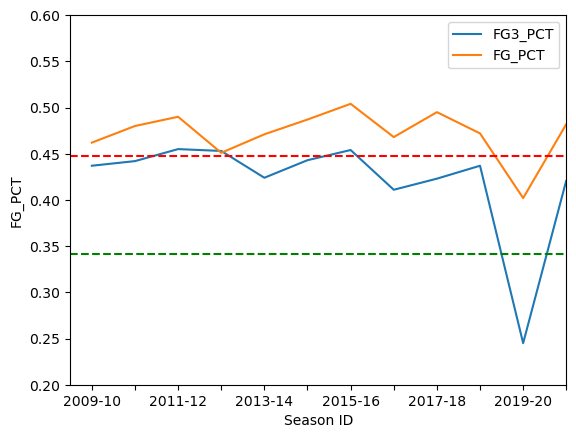

In [126]:
# FG_PCT & FG3_PCT
from matplotlib.pyplot import MultipleLocator
player_career.plot.line(x='SEASON_ID', y={'FG_PCT','FG3_PCT'})
plt.xlabel('Season ID')
plt.axhline(y=0.448, ls='--', c='r')
plt.axhline(y=0.342, ls='--', c='g')
x_major_locator=MultipleLocator(1)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(-0.5,11)
plt.ylim(0.2,0.6)
x = range(0, 13, 1)
plt.ylabel('FG_PCT')
plt.show()